# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [36]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 51 files belonging to 5 classes.


### Validation Image Preprocessing

In [37]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 51 files belonging to 5 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [38]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [39]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [42]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [44]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [45]:
cnn.add(tf.keras.layers.Flatten())

In [46]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [47]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [48]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

### Compiling and Training Phase

In [49]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [50]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         7,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,793,229 (29.73 MB)

 Trainable params: 7,793,229 (29.73 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3107 - loss: 2.8996 - val_accuracy: 0.2157 - val_loss: 2.6673
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 833ms/step - accuracy: 0.2063 - loss: 2.6822 - val_accuracy: 0.2353 - val_loss: 1.6621
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 972ms/step - accuracy: 0.3576 - loss: 1.5805 - val_accuracy: 0.2157 - val_loss: 1.6227
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 820ms/step - accuracy: 0.2506 - loss: 1.6893 - val_accuracy: 0.2157 - val_loss: 1.5145
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 840ms/step - accuracy: 0.2036 - loss: 1.6469 - val_accuracy: 0.4510 - val_loss: 1.4909
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 841ms/step - accuracy: 0.3629 - loss: 1.5629 - val_accuracy: 0.5098 - val_loss: 1.4959
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 854ms/step - accuracy: 0.3811 - loss: 1.5305 - val_accuracy: 0.3922 - val_loss: 1.4840
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 831ms/step - accuracy: 0.2690 - loss: 1.5347 - val_accuracy: 0.4510 - val_loss: 1.

## Evaluating Model

In [52]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7232 - loss: 1.4226
Training accuracy: 0.7254902124404907


In [53]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.7128 - loss: 1.4231
Validation accuracy: 0.7254902124404907


### Saving Model

In [54]:
cnn.save('trained_plant_disease_model.keras')

In [55]:
training_history.history #Return Dictionary of history

{'accuracy': [0.29411765933036804,
  0.21568627655506134,
  0.3333333432674408,
  0.23529411852359772,
  0.19607843458652496,
  0.37254902720451355,
  0.3529411852359772,
  0.29411765933036804,
  0.3137255012989044,
  0.29411765933036804],
 'loss': [2.8272368907928467,
  2.744218349456787,
  1.6171026229858398,
  1.6757210493087769,
  1.6619126796722412,
  1.5597299337387085,
  1.5683255195617676,
  1.5086312294006348,
  1.4719643592834473,
  1.5051097869873047],
 'val_accuracy': [0.21568627655506134,
  0.23529411852359772,
  0.21568627655506134,
  0.21568627655506134,
  0.45098039507865906,
  0.5098039507865906,
  0.3921568691730499,
  0.45098039507865906,
  0.5686274766921997,
  0.7254902124404907],
 'val_loss': [2.667290210723877,
  1.662146806716919,
  1.6227285861968994,
  1.514510989189148,
  1.4908894300460815,
  1.4959332942962646,
  1.4839894771575928,
  1.4808847904205322,
  1.4399003982543945,
  1.4282057285308838]}

In [56]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [57]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

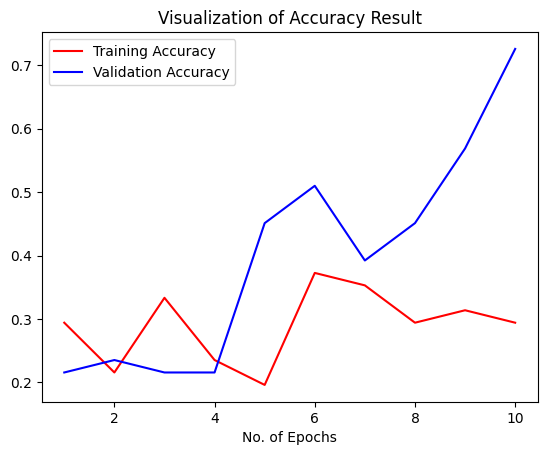

In [58]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [59]:
class_name = validation_set.class_names

In [60]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 51 files belonging to 5 classes.


In [61]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [62]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [63]:
Y_true

<tf.Tensor: shape=(51,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4], dtype=int64)>

In [64]:
predicted_categories

<tf.Tensor: shape=(51,), dtype=int64, numpy=
array([0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 0, 4, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 4, 4, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4], dtype=int64)>

In [65]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [66]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

bacterialsoft       0.67      0.91      0.77        11
   blackmould       0.67      0.91      0.77        11
      neckrot       1.00      0.55      0.71        11
  onionsmudge       0.00      0.00      0.00         7
    whiteroot       0.73      1.00      0.85        11

     accuracy                           0.73        51
    macro avg       0.61      0.67      0.62        51
 weighted avg       0.66      0.73      0.67        51



c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Confusion Matrix Visualization

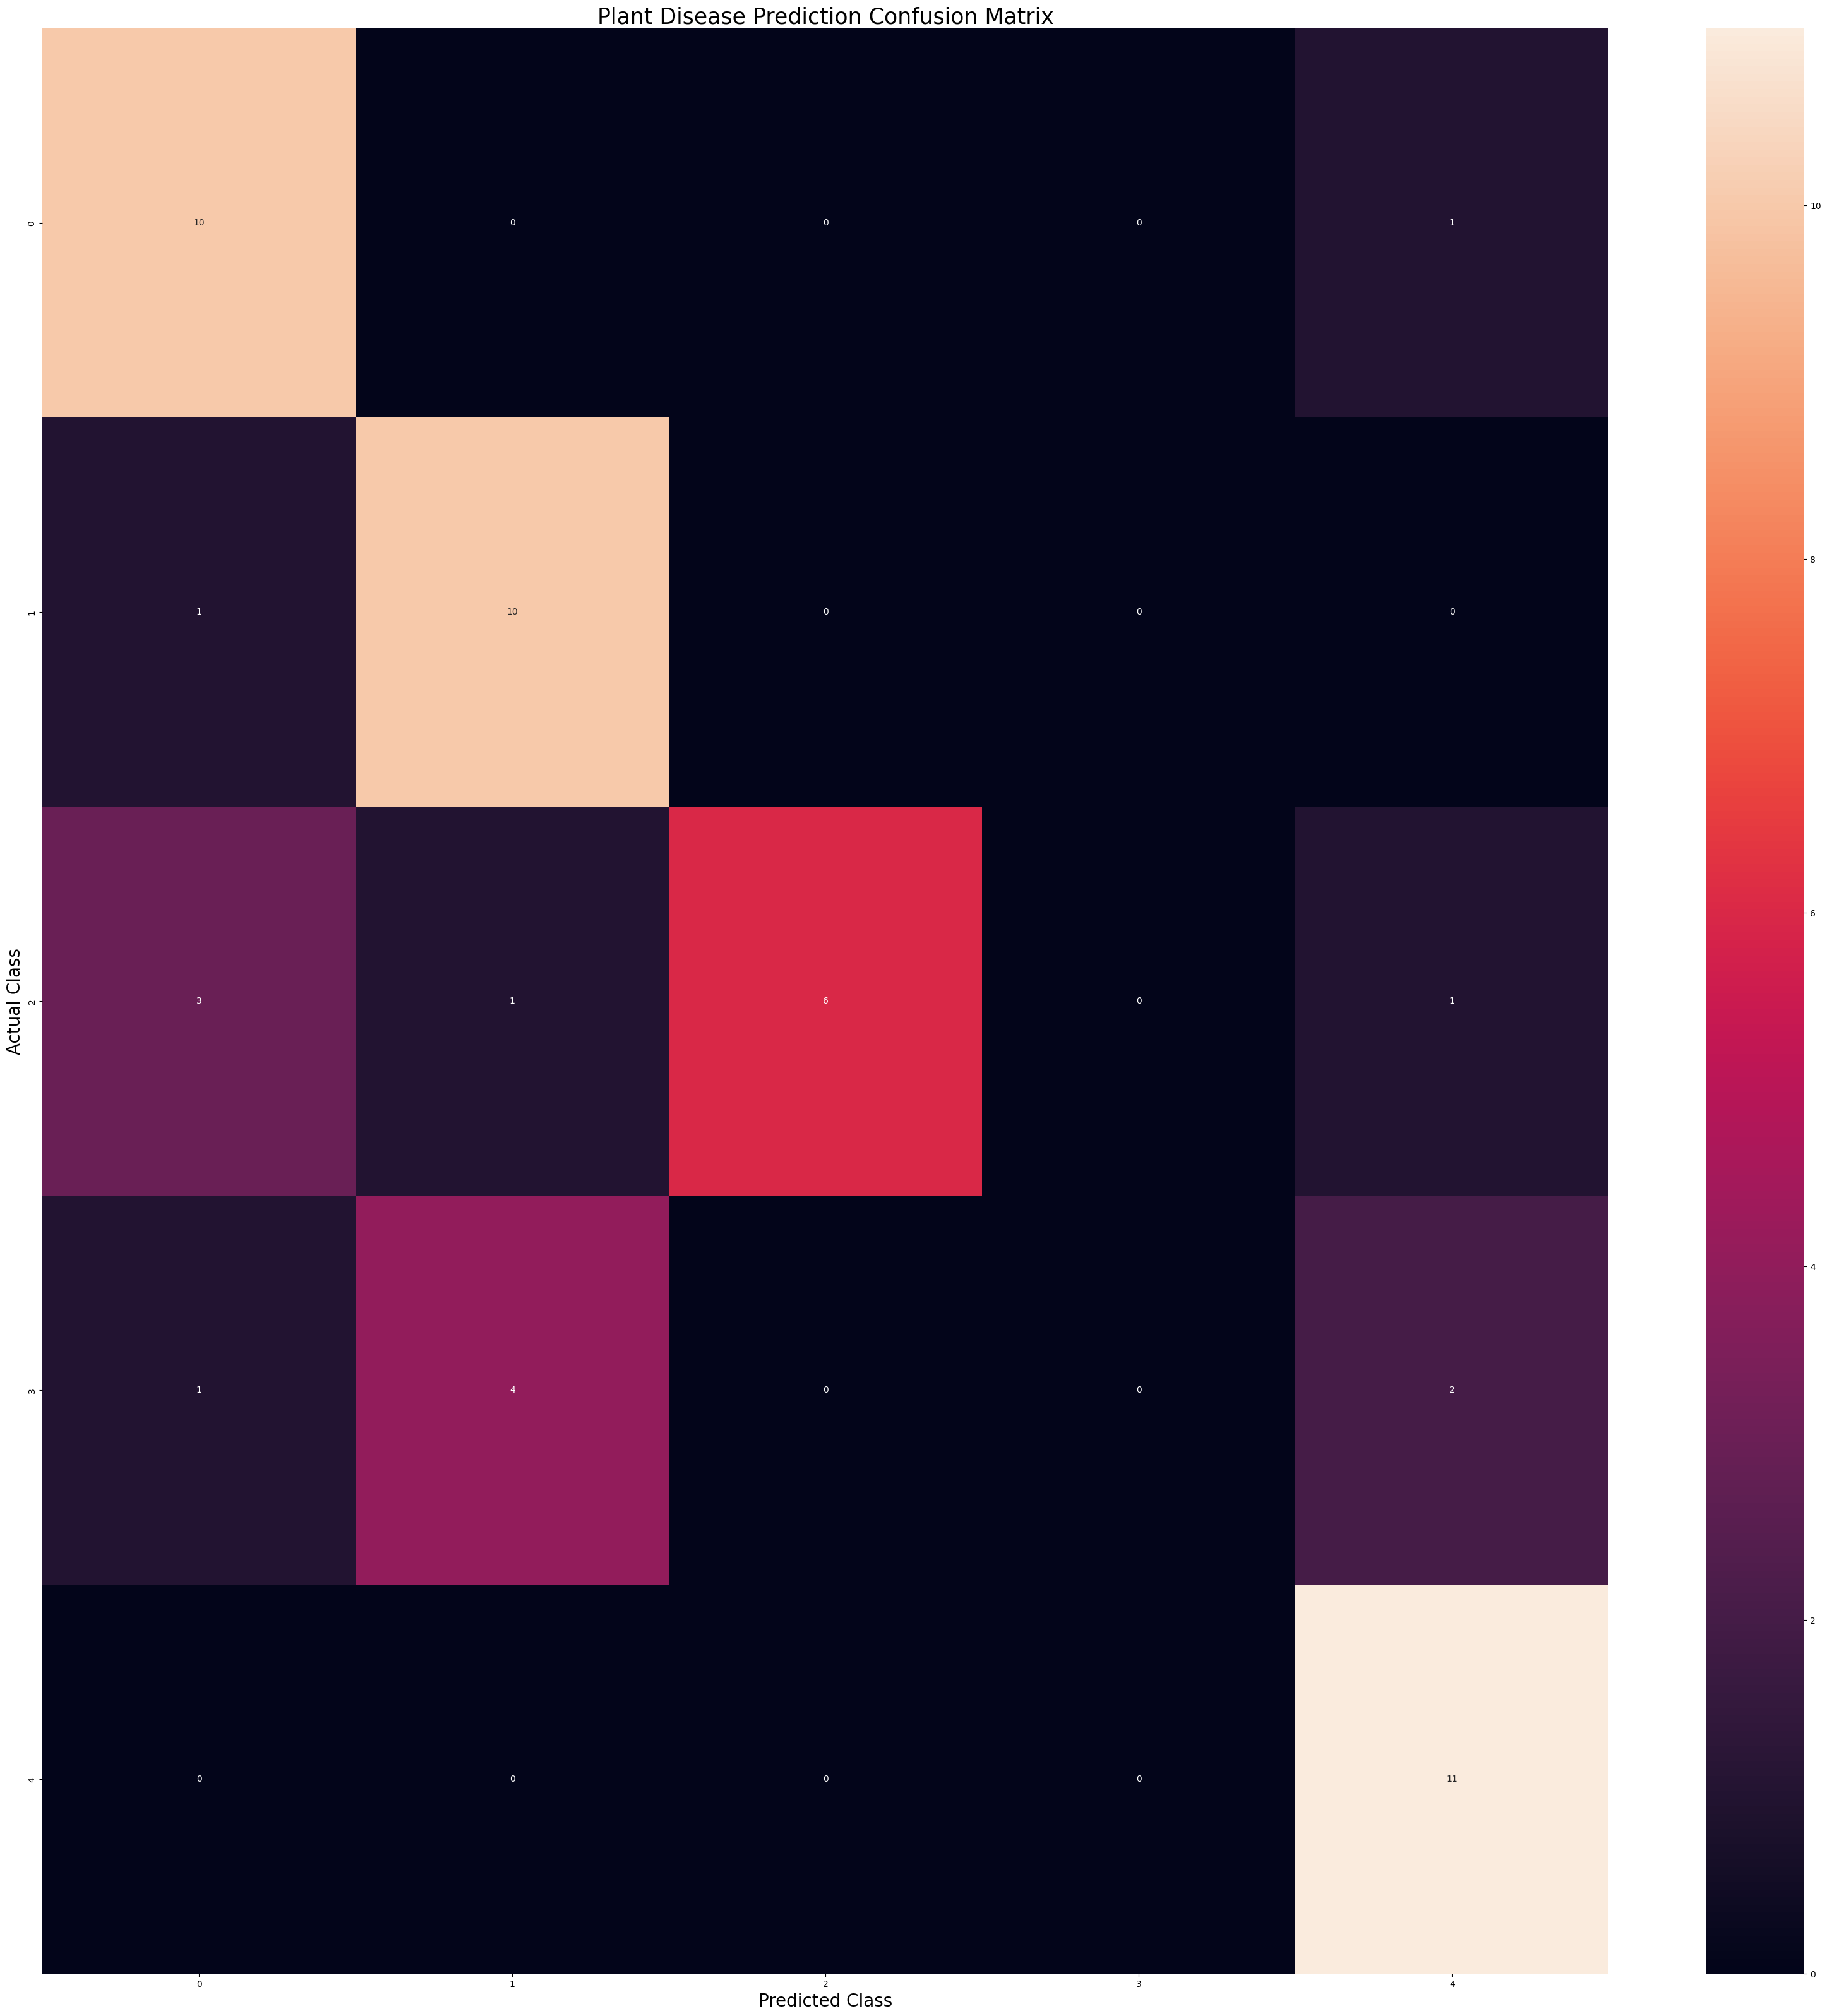

In [67]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()